<a href="https://colab.research.google.com/github/khiemtranngoc/Mortgage-PD-scorecard/blob/main/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optbinning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 37.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver doe

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from optbinning import OptimalBinning, BinningProcess
from sklearn import metrics
import matplotlib.pyplot as plt

(CVXPY) Feb 01 08:09:21 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 01 08:09:21 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/credit_risk/mortgage_sample.csv")

In [ ]:
data.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

In [ ]:
# Function to display rows with missing values from a DataFrame.

def show_rows_with_missing_values(df):

    rows_with_missing_values = df[df.isnull().any(axis=1)]

    return rows_with_missing_values

In [ ]:
show_rows_with_missing_values(data)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
26,3,25,-6,25,114,44866.18,30.551659,10.500,226.29,2.899137,...,0,48600.0,680,83.6,8.75,89.58,NaN,NaN,NaN,private
27,3,26,-6,25,114,44740.01,30.626802,10.500,225.10,2.151365,...,0,48600.0,680,83.6,8.75,89.58,NaN,NaN,NaN,private
28,3,27,-6,25,114,44615.80,30.913950,11.375,222.39,2.361722,...,0,48600.0,680,83.6,8.75,89.58,NaN,NaN,NaN,private
29,3,28,-6,25,114,44498.87,31.214710,11.375,219.67,1.229172,...,0,48600.0,680,83.6,8.75,89.58,NaN,NaN,NaN,private
30,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,0,48600.0,680,83.6,8.75,89.58,NaN,NaN,NaN,private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,16,52,177,517107.42,57.659403,2.664,181.43,1.717053,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private
622485,50000,57,16,52,177,512274.57,55.359916,2.652,187.20,2.556052,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private
622486,50000,58,16,52,177,507396.72,54.492206,2.644,188.37,2.868594,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private
622487,50000,59,16,52,177,502478.87,54.171106,2.638,187.65,2.443648,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private


In [ ]:

sample = data[(data["sample"] == "public") & ((data["time"] - data["first_time"]) % 12 == 0)]


In [ ]:
sample.head(10)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,...,0,45000.0,715,69.4,9.200,87.03,0.0,0.0,0.0,public
12,1,37,-7,25,113,32388.30,28.347862,9.200,153.35,-4.146711,...,0,45000.0,715,69.4,9.200,87.03,0.0,0.0,0.0,public
24,2,25,18,25,138,105826.38,65.231343,7.680,226.29,2.899137,...,0,107200.0,558,80.0,7.680,186.91,0.0,0.0,0.0,public
31,4,25,-2,25,119,61031.10,33.911009,10.500,226.29,2.899137,...,0,63750.0,587,81.8,10.500,97.99,0.0,0.0,0.0,public
43,4,37,-2,25,119,59023.80,48.394751,9.250,153.35,-4.146711,...,0,63750.0,587,81.8,10.500,97.99,0.0,0.0,0.0,public
55,4,49,-2,25,119,56191.06,45.599339,9.250,154.94,2.456634,...,0,63750.0,587,81.8,10.500,97.99,0.0,0.0,0.0,public
66,5,25,18,25,138,52295.07,65.446133,9.155,226.29,2.899137,...,0,52800.0,527,80.0,9.155,186.91,0.0,0.0,0.0,public
69,6,25,19,25,139,209058.33,66.733446,6.580,226.29,2.899137,...,0,212000.0,670,80.0,6.580,191.42,0.0,0.0,0.0,public
81,6,37,19,25,139,203769.85,95.983721,9.500,153.35,-4.146711,...,0,212000.0,670,80.0,6.580,191.42,0.0,0.0,0.0,public
93,6,49,19,25,139,194630.73,90.738020,6.580,154.94,2.456634,...,0,212000.0,670,80.0,6.580,191.42,0.0,0.0,0.0,public


In [ ]:
from sklearn.impute import KNNImputer

def impute_missing_values_knn(df, n_neighbors=5):
    cols_with_missing = df.columns[df.isnull().any()]
    numeric_cols_with_missing = df[cols_with_missing].select_dtypes(include=[np.number]).columns

    imputer = KNNImputer(n_neighbors=n_neighbors)

    df_numeric_imputed = df.copy()
    if len(numeric_cols_with_missing) > 0:
        imputed_data = imputer.fit_transform(df[numeric_cols_with_missing])
        df_imputed = pd.DataFrame(imputed_data, columns=numeric_cols_with_missing, index=df.index)

        for col in numeric_cols_with_missing:
            df_numeric_imputed[col] = df_numeric_imputed[col].fillna(np.round(df_imputed[col]))

    return df_numeric_imputed

In [ ]:
sample = impute_missing_values_knn(sample)

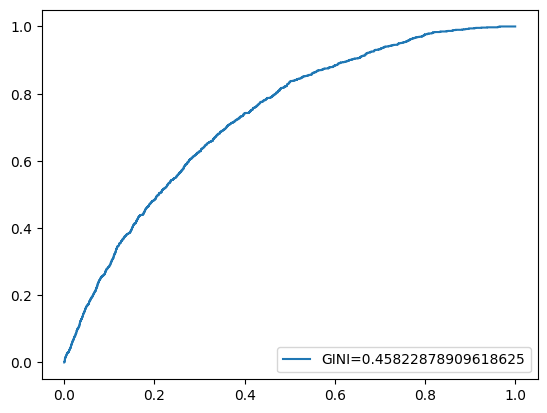

In [ ]:
#%% Binning Process
predictors = ["FICO_orig_time", "LTV_time", "gdp_time", "uer_time", "investor_orig_time", "Interest_Rate_orig_time"]
binning_process = BinningProcess(variable_names = predictors)

X = sample[predictors]
y = sample["default_time"]

binning_process.fit_transform(X, y)
binning_process.summary()

#%% 4. Regression estimation
X = sm.add_constant(X.dropna())

#%%
logit_mod = sm.Logit(endog=y, exog=X)
estimated_model = logit_mod.fit(disp=0)
y_pred = estimated_model.predict()

fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
auc = metrics.roc_auc_score(y, y_pred)
plt.plot(fpr,tpr,label="GINI="+str(2*auc-1))
plt.legend(loc=4)
plt.show()



In [ ]:
estimated_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default_time   No. Observations:                70715
Model:                          Logit   Df Residuals:                    70708
Method:                           MLE   Df Model:                            6
Date:                Thu, 01 Feb 2024   Pseudo R-squ.:                 0.06001
Time:                        09:27:42   Log-Likelihood:                -5746.9
converged:                       True   LL-Null:                       -6113.8
Covariance Type:            nonrobust   LLR p-value:                3.153e-155
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.5308      0.307     -4.993      0.000      -2.132      -0.930
FICO_orig_time             -0.0070      0.000    -16.572      0.000      -0.008      -0.006
LTV_time                    0.0152      0.002      9.735      0.000       0.012       0.018
gdp_time                   -0.1057      0.014     -7.354      0.000      -0.134      -0.078
uer_time                    0.1133      0.018      6.236      0.000       0.078       0.149
investor_orig_time          0.3242      0.089      3.656      0.000       0.150       0.498
Interest_Rate_orig_time     0.0227      0.009      2.450      0.014       0.005       0.041
===========================================================================================
"""

In [ ]:
binningSummary = binning_process.summary()

binningSummary

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,FICO_orig_time,numerical,OPTIMAL,True,9,0.204441,0.024945,0.245467,0.07883
1,LTV_time,numerical,OPTIMAL,True,9,0.393163,0.047746,0.338423,0.000495
2,gdp_time,numerical,OPTIMAL,True,5,0.239997,0.029364,0.265188,0.629297
3,uer_time,numerical,OPTIMAL,True,9,0.272406,0.03317,0.284036,0.065267
4,investor_orig_time,numerical,OPTIMAL,True,2,0.000105,0.000013,0.003472,0.000037
5,Interest_Rate_orig_time,numerical,OPTIMAL,True,9,0.23863,0.028663,0.254101,0.320012


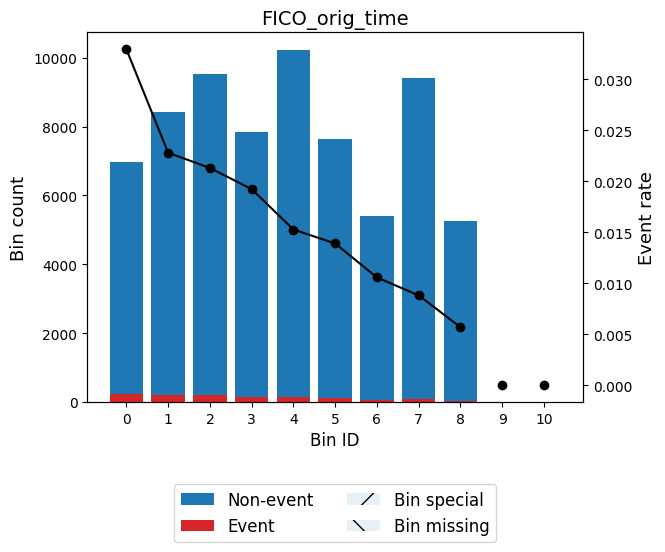

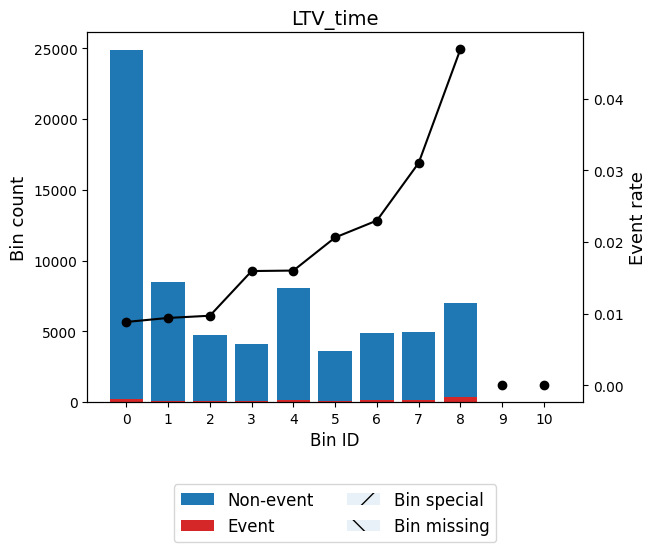

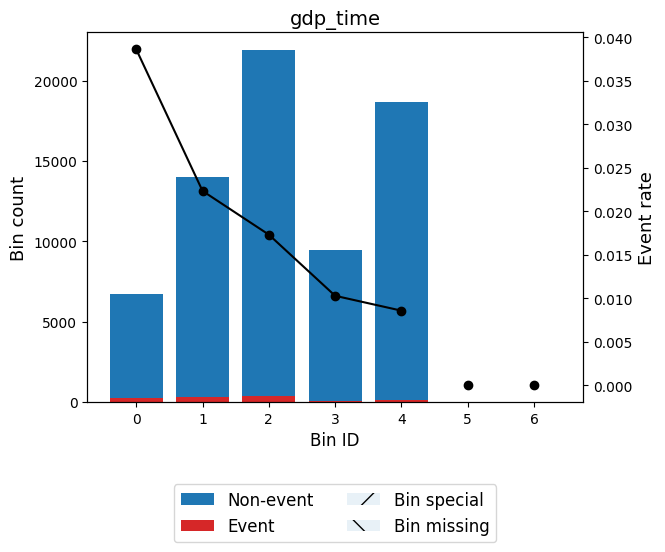

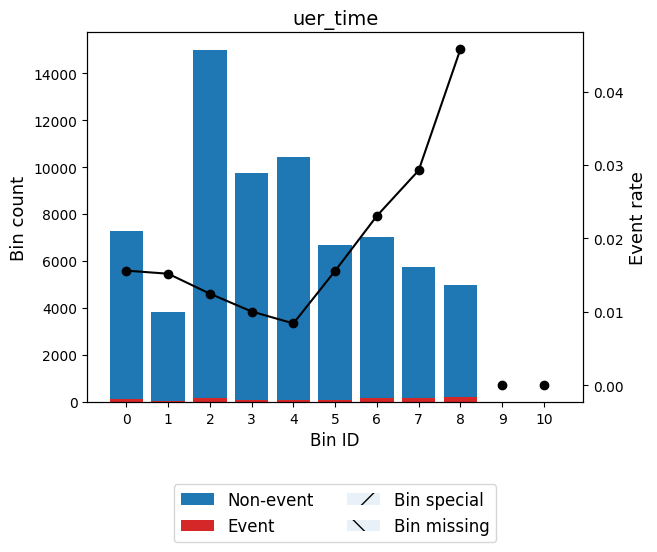

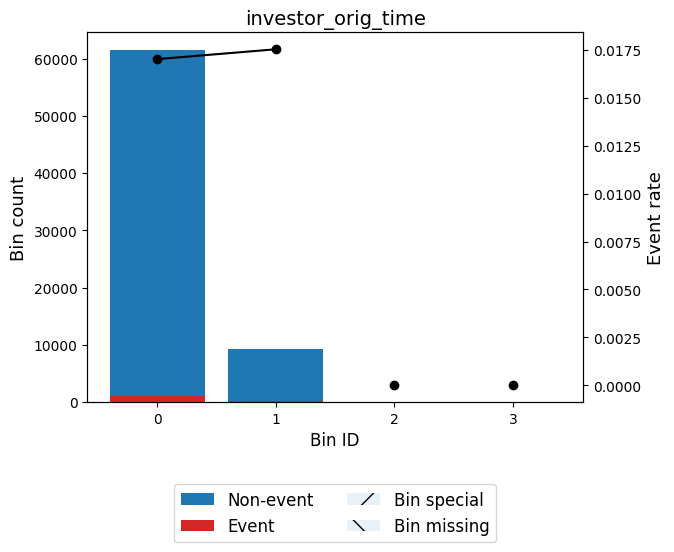

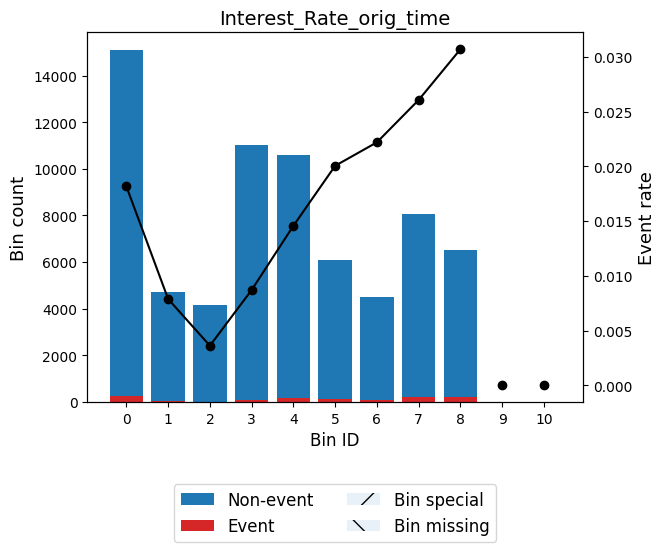

,Factor,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,FICO_orig_time,"(-inf, 566.50)",6984,0.098763,6754,230,0.032932,-0.67265,0.062709,0.007694
1,FICO_orig_time,"[566.50, 611.50)",8424,0.119126,8232,192,0.022792,-0.294172,0.011916,0.001484
2,FICO_orig_time,"[611.50, 642.50)",9530,0.134766,9327,203,0.021301,-0.224999,0.007618,0.000950
3,FICO_orig_time,"[642.50, 664.50)",7854,0.111066,7703,151,0.019226,-0.120376,0.001707,0.000213
4,FICO_orig_time,"[664.50, 692.50)",10221,0.144538,10065,156,0.015263,0.114502,0.001794,0.000224
5,FICO_orig_time,"[692.50, 715.50)",7625,0.107827,7519,106,0.013902,0.209288,0.004275,0.000533
6,FICO_orig_time,"[715.50, 734.50)",5393,0.076264,5336,57,0.010569,0.486719,0.014399,0.001782
7,FICO_orig_time,"[734.50, 772.50)",9415,0.133140,9332,83,0.008816,0.669903,0.043913,0.005389
8,FICO_orig_time,"[772.50, inf)",5269,0.074510,5239,30,0.005694,1.110227,0.056110,0.006674
9,FICO_orig_time,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [ ]:
factors = binning_process.get_support(names = True)
WOESummary = []

for factor in factors:

  # Build table
  build = binning_process.get_binned_variable(factor)

  # WOE
  WOETable = build.binning_table.build()
  WOETable['Factor'] = factor
  WOETable = WOETable.drop(WOETable.tail(1).index) #Drop total row
  WOESummary.append(WOETable)

  # Plot
  build.binning_table.plot(metric = 'event_rate')

WOESummary = pd.concat(WOESummary, axis = 0)

# Reorder columns
cols = WOESummary.columns
cols = cols[-1:].append(cols[:-1])
WOESummary = WOESummary[cols]
WOESummary

In [ ]:
WOESummary[WOESummary["Factor"]=="LTV_time"]

,Factor,Bin,Count,Count (%),Non-event,Event,DF,WoE,IV,JS
0,LTV_time,"(-inf, 73.68)",24877,0.351792,24657,220,0.008844,0.666727,0.115092,0.014126
1,LTV_time,"[73.68, 78.72)",8508,0.120314,8428,80,0.009403,0.604827,0.033283,0.004098
2,LTV_time,"[78.72, 80.16)",4736,0.066973,4690,46,0.009713,0.572085,0.016817,0.002074
3,LTV_time,"[80.16, 82.11)",4138,0.058517,4072,66,0.015950,0.069773,0.000275,0.000034
4,LTV_time,"[82.11, 88.69)",8054,0.113894,7925,129,0.016017,0.065504,0.000474,0.000059
5,LTV_time,"[88.69, 93.03)",3634,0.051389,3559,75,0.020638,-0.192715,0.002097,0.000262
6,LTV_time,"[93.03, 100.38)",4869,0.068854,4757,112,0.023003,-0.303588,0.007370,0.000918
7,LTV_time,"[100.38, 110.18)",4929,0.069702,4776,153,0.031041,-0.611541,0.035435,0.004362
8,LTV_time,"[110.18, inf)",6970,0.098565,6643,327,0.046915,-1.041103,0.182320,0.021814
9,LTV_time,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [ ]:
WOESummary = WOESummary.rename(columns={
    'Event rate': 'DF'
})

In [ ]:
import numpy as np
import pandas as pd

def calculate_scorecard_points(WOESummary, alpha, beta):
    """
    Calculate score points for each bin using the provided formula.

    WOESummary: DataFrame containing bins and their corresponding event rate (PD).
    alpha: The offset constant for the scorecard points calculation.
    beta: The scaling factor for the scorecard points calculation.
    """
    # Check if 'Event Rate' column exists
    if 'DF' not in WOESummary.columns:
        raise ValueError("WOESummary must contain an 'Event Rate' column.")

    # Initialize an empty column for scorecard points if it doesn't already exist
    if 'Scorecard Points' not in WOESummary.columns:
        WOESummary['Scorecard Points'] = np.nan

    # Calculate scorecard points for each bin using the log odds formula
    for index, row in WOESummary.iterrows():
        PD = row['DF']  # Access the Event Rate for the bin
        # Prevent division by zero in the case of PD being 0 or 1
        if PD == 0:
            PD = 0.0001
        elif PD == 1:
            PD = 0.9999
        # Calculate scorecard points using the formula
        score_points = alpha + beta * np.log(PD / (1 - PD))
        WOESummary.at[index, 'Scorecard Points'] = score_points

    return WOESummary

In [ ]:
alpha =500
beta = 50

WOESummary_with_points = calculate_scorecard_points(WOESummary, alpha, beta)

In [ ]:
WOESummary_with_points = WOESummary_with_points.rename(columns={
    'Factor':'Predictor',
    'Non-event': 'non-default',
    'Event': 'default',
    'Event rate': 'DF'
})

In [ ]:
WOESummary_with_points['DF'] = (WOESummary_with_points['DF'] * 100).round(2).astype(str) + '%'

In [ ]:
WOESummary_with_points

,Predictor,Bin,Count,Count (%),non-default,default,DF,WoE,IV,JS,Scorecard Points
0,FICO_orig_time,"(-inf, 566.50)",6984,0.098763,6754,230,3.29%,-0.67265,0.062709,0.007694,300.479883
1,FICO_orig_time,"[566.50, 611.50)",8424,0.119126,8232,192,2.28%,-0.294172,0.011916,0.001484,258.196631
2,FICO_orig_time,"[611.50, 642.50)",9530,0.134766,9327,203,2.13%,-0.224999,0.007618,0.000950,219.040380
3,FICO_orig_time,"[642.50, 664.50)",7854,0.111066,7703,151,1.92%,-0.120376,0.001707,0.000213,263.226641
4,FICO_orig_time,"[664.50, 692.50)",10221,0.144538,10065,156,1.53%,0.114502,0.001794,0.000224,289.283112
5,FICO_orig_time,"[692.50, 715.50)",7625,0.107827,7519,106,1.39%,0.209288,0.004275,0.000533,305.517836
6,FICO_orig_time,"[715.50, 734.50)",5393,0.076264,5336,57,1.06%,0.486719,0.014399,0.001782,310.711036
7,FICO_orig_time,"[734.50, 772.50)",9415,0.133140,9332,83,0.88%,0.669903,0.043913,0.005389,318.941936
8,FICO_orig_time,"[772.50, inf)",5269,0.074510,5239,30,0.57%,1.110227,0.056110,0.006674,327.357969
9,FICO_orig_time,Special,0,0.000000,0,0,0.0%,0.0,0.000000,0.000000,39.487982


In [ ]:
def calculate_scorecard_points(WOESummary, logit_coefs, reference_score, pdo):
    # pdo is Points to Double the Odds
    factor = pdo / np.log(2)

    # Calculate the offset using the logistic regression intercept
    offset = reference_score - (factor * logit_coefs['intercept'])

    # Initialize an empty column for scorecard points if it doesn't already exist
    if 'Scorecard Points' not in WOESummary.columns:
        WOESummary['Scorecard Points'] = np.nan

    # Calculate scorecard points for each bin
    for index, row in WOESummary.iterrows():
        predictor = row['Factor']
        if predictor in logit_coefs:
            # Calculate the scorecard points by multiplying the WoE by the factor and the logistic coefficient
            # The offset is not distributed across predictors; it's a constant that shifts the entire score
            WOESummary.at[index, 'Scorecard Points'] = row['WoE'] * logit_coefs[predictor] * factor + offset

    return WOESummary

In [ ]:
logit_coefs = {'intercept': -1.5205, 'FICO_orig_time': -0.0070, 'LTV_time': 0.0151, 'gdp_time': -0.1059, 'uer_time': 0.1134, 'investor_orig_time': 0.3242, 'Interest_Rate_orig_time': 0.0225}
reference_score = 500
pdo = 50


scorecard = calculate_scorecard_points(WOESummary,logit_coefs, reference_score, pdo)


In [ ]:

scorecard = scorecard.rename(columns={
    'Factor':'Predictor',
    'Non-event': 'non-default',
    'Event': 'default',
    'Event rate': 'DF'
})










In [ ]:
scorecard['DF'] = (scorecard['DF'] * 100).round(2).astype(str) + '%'

In [ ]:
scorecard

,Predictor,Bin,Count,Count (%),non-default,default,DF,WoE,IV,JS,Scorecard Points
0,FICO_orig_time,"(-inf, 566.50)",6984,0.098763,6754,230,3.29%,-0.67265,0.062709,0.007694,609.580167
1,FICO_orig_time,"[566.50, 611.50)",8424,0.119126,8232,192,2.28%,-0.294172,0.011916,0.001484,610.952708
2,FICO_orig_time,"[611.50, 642.50)",9530,0.134766,9327,203,2.13%,-0.224999,0.007618,0.000950,612.223745
3,FICO_orig_time,"[642.50, 664.50)",7854,0.111066,7703,151,1.92%,-0.120376,0.001707,0.000213,610.789431
4,FICO_orig_time,"[664.50, 692.50)",10221,0.144538,10065,156,1.53%,0.114502,0.001794,0.000224,609.943621
5,FICO_orig_time,"[692.50, 715.50)",7625,0.107827,7519,106,1.39%,0.209288,0.004275,0.000533,609.416632
6,FICO_orig_time,"[715.50, 734.50)",5393,0.076264,5336,57,1.06%,0.486719,0.014399,0.001782,609.248057
7,FICO_orig_time,"[734.50, 772.50)",9415,0.133140,9332,83,0.88%,0.669903,0.043913,0.005389,608.980877
8,FICO_orig_time,"[772.50, inf)",5269,0.074510,5239,30,0.57%,1.110227,0.056110,0.006674,608.707687
9,FICO_orig_time,Special,0,0.000000,0,0,0.0%,0.0,0.000000,0.000000,609.680890
